# SVM分类

# 线性SVM分类

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris['data'][:,(2,3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
    ('Scaler',StandardScaler()),
    ('Linear_svc',LinearSVC(C=1,loss='hinge'))
))
svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5,1.7]])

array([1.])

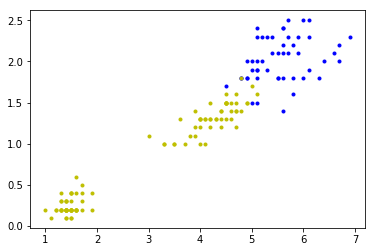

In [8]:
import matplotlib.pyplot as plt 

plt.plot(x[:,0][y==1],x[:,1][y==1],'b.')
plt.plot(x[:,0][y==0],x[:,1][y==0],'y.')

# 非线性SVM分类

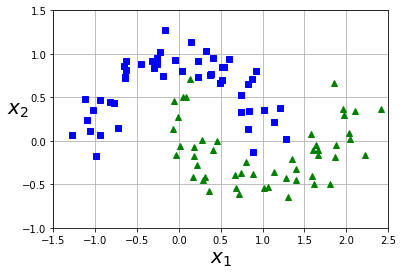

In [9]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0],x[:, 1][y==0], "bs")
    plt.plot(x[:, 0][y==1],x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ('Poly_features',PolynomialFeatures(degree=3)),
    ('Scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
))
polynomial_svm_clf.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('Poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

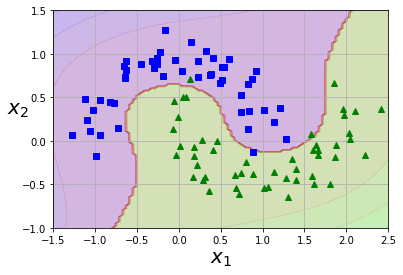

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)  #从坐标向量中返回坐标矩阵
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)  #decision_function决策函数,返回实例到各个类别的距离
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# 多项式核

In [12]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=3,coef0=1,C=5))
))

poly_kernel_svm_clf.fit(x,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

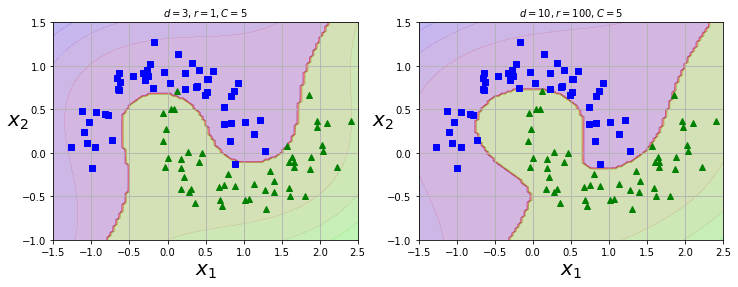

In [13]:
plt.figure(figsize=(12, 4))
# d=3, r=1, C=5
plt.subplot(121)
plt.title(r"$d=3, r=1, C=5$", fontsize=10)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

# d=10, r=100, C=5
plt.subplot(122)
plt.title(r"$d=10, r=100, C=5$", fontsize=10)
poly_kernel_svm_clf2 = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=10,coef0=100,C=5))
))

poly_kernel_svm_clf2.fit(x,y)

plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

# 添加相似特征

*公式:高斯RBF*
![image.png](datasets/expression/高斯RBF.PNG)

In [14]:
# 在x1添加x1=-2和x1=1
# 我们看实例x1=-1： 它与第一个地标的距离为1， 与第二个地标的距离为2。 
# 因此它的新特征为 x2=eps（-0.3×12） ≈0.74， x3=eps（-0.3×22） ≈0.30

In [15]:
# rbf_kernel_svm_clf = Pipeline((
#         ("scaler", StandardScaler()),
#         ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
#     ))
# rbf_kernel_svm_clf.fit(x, y)

def rbf_plot(gamma,C):
    global x,y
    rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ))
    rbf_kernel_svm_clf.fit(x, y)
    return rbf_kernel_svm_clf


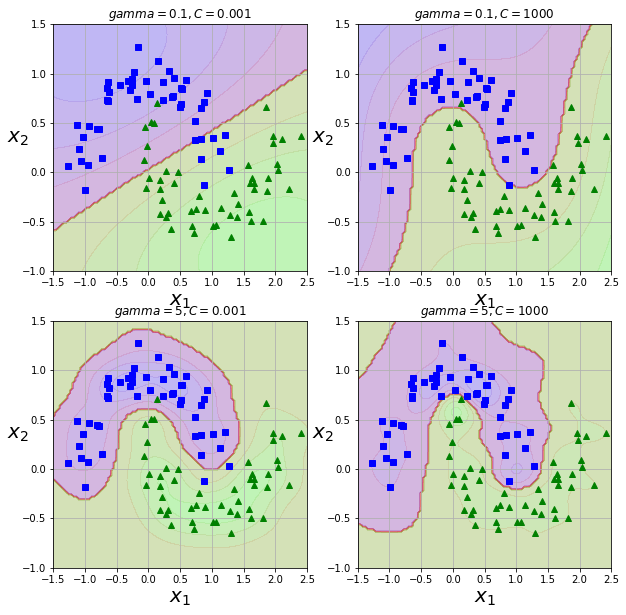

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title(r"$gamma=0.1, C=0.001$", fontsize=12)
plot_predictions(rbf_plot(gamma=0.1, C=0.001), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(222)
plt.title(r"$gamma=0.1, C=1000$", fontsize=12)
plot_predictions(rbf_plot(gamma=0.1, C=1000), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(223)
plt.title(r"$gamma=5, C=0.001$", fontsize=12)
plot_predictions(rbf_plot(gamma=5, C=0.001), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(224)
plt.title(r"$gamma=5, C=1000$", fontsize=12)
plot_predictions(rbf_plot(gamma=5, C=1000), [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

In [17]:
# 有一个经验法则是， 永远先从线性核函数开始尝试（要记住， LinearSVC比SVC（kernel="linear"） 快得多） ，
# 特别是训练集非常大或特征非常多的时候。 
# 如果训练集不太大， 你可以试试高斯RBF核， 大多数情况下它都非常好用。 

# 计算复杂度

![image.png](datasets/expression/SVM分类比较.PNG)

# SVM回归

**线性**

In [18]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

In [19]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [20]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
#     plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

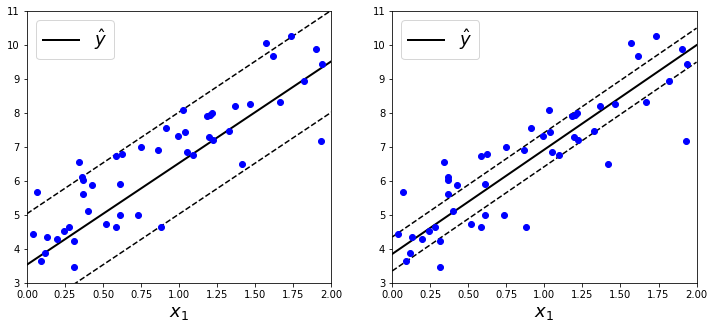

In [21]:
svm_reg1 = LinearSVR(epsilon=1.5,random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5,random_state=42)
svm_reg1.fit(x,y)
svm_reg2.fit(x,y)

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_svm_regression(svm_reg1,x,y,[0, 2, 3, 11])
plt.subplot(122)
plot_svm_regression(svm_reg2,x,y,[0, 2, 3, 11])

**非线性**

In [22]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()


In [23]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x, y)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


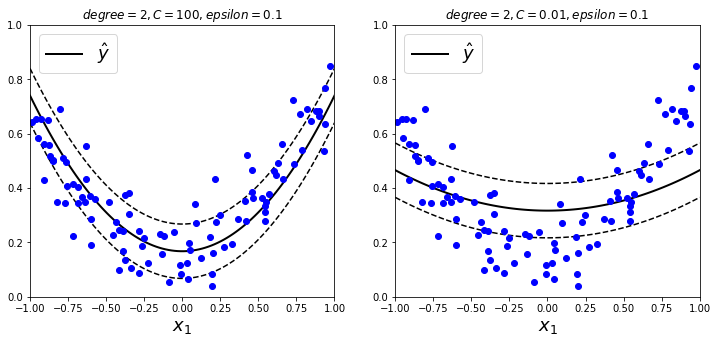

In [24]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('$degree=2, C=100, epsilon=0.1$')
plot_svm_regression(svm_poly_reg1,x,y,[-1, 1, 0, 1])
plt.subplot(122)
plt.title('$degree=2, C=0.01, epsilon=0.1$')
plot_svm_regression(svm_poly_reg2,x,y,[-1, 1, 0, 1])

**1.支持向量机的基本思想是什么？**

1.支持向量机的基本思想是拟合类别之间可能的、 最宽的“街
道”。 换言之， 它的目的是使决策边界之间的间隔最大化， 从而分隔
出两个类别的训练实例。 SVM执行软间隔分类时， 实际上是在完美
590分类和拟合最宽的街道之间进行妥协（也就是允许少数实例最终还是
落在街道上） 。 还有一个关键点是在训练非线性数据集时， 记得使用
核函数。

**2.什么是支持向量？**

2.支持向量机的训练完成后， 位于“街道”（参考上一个答案） 之
上的实例被称为支持向量， 这也包括处于边界上的实例。 决策边界完
全由支持向量决定。 非支持向量的实例（也就是街道之外的实例） 完
全没有任何影响， 你可以选择删除它们然后添加更多的实例， 或者是
将它们移开， 只要一直在街道之外， 它们就不会对决策边界产生任何
影响。 计算预测结果只会涉及支持向量， 而不涉及整个训练集。


**3.使用SVM时， 对输入值进行缩放为什么重要？**

3.支持向量机拟合类别之间可能的、 最宽的“街道”（参考第一题
答案） ， 所以如果训练集不经缩放， SVM将趋于忽略值较小的特征
（见图5-2）

**4.SVM分类器在对实例进行分类时， 会输出信心分数么？ 概率呢？**

4.支持向量机分类器能够输出测试实例与决策边界之间的距离，
你可以将其用作信心分数。 但是这个分数不能直接转化成类别概率的
估算。 如果创建SVM时， 在Scikit-Learn中设置probability=True， 那么
训练完成后， 算法将使用逻辑回归对SVM分数进行校准（对训练数
据额外进行5-折交叉验证的训练） ， 从而得到概率值。 这会给SVM添
加predict_proba（） 和predict_log_proba（） 两种方法。

**5.如果训练集有上千万个实例和几百个特征， 你应该使用SVM原始问题还是对偶问题来训练模型？**

5.这个问题仅适用于线性支持向量机， 因为核SVM只能使用对偶
问题。 对于SVM问题来说， 原始形式的计算复杂度与训练实例的数
量成正比， 而其对偶形式的计算复杂度与某个介于m2和m3之间的数
量成正比。 所以如果实例的数量以百万计， 一定要使用原始问题， 因
为对偶问题会非常慢。

**6.假设你用RBF核训练了一个SVM分类器， 看起来似乎对训练集拟合不足， 你应该提升还是降低γ（gamma） ？ C呢？**

6.如果一个使用RBF核训练的支持向量机对训练集拟合不足， 可
能是由于过度正则化导致的。 您需要提升gamma或C（或同时提升二
者） 来降低正则化。